# Real Estate Data Science Project

Bearbeitet von: 2341463 und 1269263

### Inhaltsverzeichnis

## 1. Business Understanding (3 Punkte) (BEIDE)

**Aufgabenstellung**: _Formulieren Sie ein Ziel oder mehrere
Ziele nach dem CRISP-DM Prozess, die für Immobilienspekulant*innen sinnvoll sind.
Bei Spekulationen werden typischerweise Immobilien erstanden, die wieder mit
Gewinn abgestoßen werden. Beginnen Sie mit der Idee „Wir brauchen mehr
Verständnis des Verkaufspreises (Z_Verkaufspreis)!“. Geben Sie Ihre Ziele in
Ihrem Jupyter-Notebook als Markup an (max. ½ Seite). Wichtig ist hier, eigene zu
untersuchende Hypothesen aufzustellen, die dann in Aufgabenteil 2 untersucht
werden. Nutzen Sie auch die vorhandenen Daten, um die Hypothesen zu ergänzen
oder anzupassen, wenn notwendig._


### Ziele der Immobilienspekulant*innen
Als Immobilienspekulant*innen bezeichnet man Personen, die eine Vielzahl von Immobilien erwerben und darauf hoffen, dass der Preis der Immobilien in Zukunft steigen wird. Die Häuser oder Wohnungen können dann mit Gewinn verkauft werden. Für die Kaufentscheidung und die einfache Bewertung der Attraktivität einer Immobilie, stehen für diese Personengruppe folgende Ziele und Anforderungen im Vordergrund:
1. Mehr Verständnis für den Verkaufspreis (Z_Verkaufspreis) schaffen
2. Auswirkungen der einzelnen Parameter auf den Verkaufspreis untersuchen
3. Identifikation von Attributen, die sich kaum oder gar nicht auf den Verkaufspreis auswirken
4. Klassifikation der Attraktivität der Angebote anhand des angebotenen Verkaufspreises in die drei Kategorien "gut", "neutral" und "schlecht"

### Ziele des Business Understanding (Geschäftsverständnis)
- Was sind die Ziele auf Geschäftsebene?
- Welche Anforderungen an das Ergebnis gibt es?
- Welche offenen Fragen sollen beantwortet werden?
- Wie könnten beispielhafte Antworten oder Ergebnisse aussehen?

Ein Haupziel auf dem Bereich der Geschäftsebene ist es, den Entscheidungsprozess für die Bewertung und den Kauf von Immobilien zu unterstützen. Durch die Anlyse der Daten sollen Vorhersagen zur Attraktivität der Angebote und die Auswirkungen der einzelnen Attribute (Parameter) auf den veranschlagten Preis bestimmt werden. Das Ergebnis sollte auch für nicht DataScience-kundige Anwender*innen verständlich und aussagekräftig gestaltet sein. Die zu beantortenden Fragen wurden als Ziele für die Untersuchung definiert (siehe vorherigen Abschnitt). Die Ergebnisse lassen sich in zwei Bereiche einteilen: 
* Für Angebote mit vorgegebenen (bekannten) Verkaufspreis soll eine automatische Klassifikation in die drei Gruppen "gutes Angebot", "neutral" und "schlechtes Angebot" erfolgen, damit die Immobilienspekulierenden eine vorab Einschätzung und eine damit verbundene Zeit- und Aufwandseinsparung erhalten. 
* Für Angebote mit unbekanntem Verkaufspreis soll anhand der Immobilien-Attribute eine Einschätzung und Vorhersage des Preises erfolgen.

## 2. Data Exploration und Analyse (9 Punkte) (BEIDE)

**Aufgabenstellung**: _Laden und untersuchen Sie den
Datensatz in data_for_training.csv nach den Regeln wie in der Vorlesung
gelehrt. Nutzen Sie Mark-Up, um wichtige Erkenntnisse zu dokumentieren._

### Module und Datensätze importieren

In [3]:
# Import modules and packages
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics


# Import training and test data
df_train = pd.read_csv("data_for_training.csv", delimiter=";").drop(columns="A_Index")
df_test = pd.read_csv("data_for_test.csv", delimiter=";").drop(columns="A_Index")

# Output training dataframe
df_train

,AnzahlZimmer,Ausbaustufe,Baeder,BaederKG,Baujahr,EG_qm,Garage_qm,Garagen,Gesamteindruck,Keller_Typ_qm,Keller_qm,Kellerhoehe,Kellertyp,Lage,OG_qm,Umgebaut,Verkaufsjahr,Verkaufsmonat,Wohnflaeche_qm,Z_Verkaufspreis
0,3,1 Ebene,2,1,1992,125,49,2,3,88,116,Gut,Guter Wohnraum,Bezirk 19,0,1992,2021,6,125,187500
1,2,1 Ebene,2,1,2010,170,79,3,3,141,168,Gut,Guter Wohnraum,Bezirk 16,0,2010,2020,7,170,350000
2,2,1 Ebene,2,0,2015,119,40,2,3,0,119,Gut,Rohbau,Bezirk 18,0,2015,2018,3,119,171750
3,2,2 Ebenen,3,1,2015,64,40,2,3,48,64,Gut,Guter Wohnraum,Bezirk 18,73,2016,2020,10,138,154000
4,3,1 Ebene,2,0,2021,103,39,2,3,3,103,Gut,Guter Wohnraum,Bezirk 8,0,2021,2022,3,103,213899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2337,3,1 Ebene,2,1,1989,109,40,2,4,57,105,Durchschnitt,Mittlerer Wohnraum,Bezirk 14,0,1989,2022,5,109,218499
2338,3,1 Ebene,2,1,1969,153,41,2,3,14,96,Durchschnitt,Freizeitraum,Bezirk 22,0,2012,2018,1,153,155000
2339,3,2 Ebenen,3,0,1997,83,40,2,3,0,62,Gut,Rohbau,Bezirk 23,64,1997,2022,6,147,204699
2340,3,2 Ebenen,2,0,1984,46,21,1,3,21,46,Durchschnitt,Kein Wohnraum,Bezirk 13,46,1984,2019,5,92,85500


## 3. Data Preparation (3 Punkte) (Jonathan)

**Aufgabenstellung**: _Bereinigen Sie die Daten und führen Sie Feature
Engineering durch. Hinweis: Kann bereits für Aufgabe 2 teilweise notwendig sein,
dann kenntlich machen und zusammenfassend aufführen._

### Fragestellungen der Data Preparation (Datenvorbereitung)
- Können die Daten in der vorliegenden Form verwendet werden?
- Wie können diese vorverarbeitet werden, um sie zu verwenden?

### Encoding kategorischer Daten
Im Bereich der Datenvorbereitung ist die Kodierung kategorischer Daten eine zentrale Aufgabe. Die meisten Daten im realen Leben bestehen bekannterweise aus kategorischen String-Werten. Für die computergestützte Verarbeitung benötigen die Modelle jedoch Fließkommazahlen oder ganze Zahlen.
- **Kategoriale Daten:** gesammelte Informationen, die in Gruppen eingeteilt sind
    - Nominalskala: Diese Art von kategorialen Daten besteht aus der Namensvariablen ohne numerische Werte.
    - Ordinalskala: Diese Art von kategorialen Daten besteht aus einer Reihe von Ordnungen oder Skalen.
- **Label Encoding:** Diese Art der Kodierung wird verwendet, wenn die Variablen in den Daten ordinal sind. Bei der ordinalen Kodierung wird jede Bezeichnung in ganzzahlige Werte umgewandelt, und die kodierten Daten stellen die Reihenfolge der Bezeichnungen dar.
- **One-Hot Encoding:** Bei der One-Hot-Codierung erhält jede Kategorie einer kategorialen Variable eine neue Variable. Dabei wird jede Kategorie mit Binärzahlen  abgebildet. Diese Art der Kodierung wird verwendet, wenn die Daten nominal sind. Neu erstellte binäre Merkmale können als Dummy-Variablen betrachtet werden. Nach einer Hot-Codierung hängt die Anzahl der Dummy-Variablen von der Anzahl der in den Daten vorhandenen Kategorien ab.

In [4]:
# Show all columns which need to be encoded
columns_object = df_train.dtypes[df_train.dtypes == "object"].index
print(columns_object, "\n----------")

# Show all individual entry names of the found columns
for col in columns_object:
    print(f"{col.rstrip()}: {df_train.loc[:, col].unique()}\n")

# Create a copy of the Training DataFrame
df_train_cleaned = df_train.copy(deep=True)

Index(['Ausbaustufe', 'Kellerhoehe', 'Kellertyp', 'Lage'], dtype='object') 
----------
Ausbaustufe: ['1 Ebene' '2 Ebenen' '3 Ebenen']

Kellerhoehe: ['Gut' 'Durchschnitt' '0' 'Sehr gut' 'Schlecht' 'Sehr Schlecht']

Kellertyp: ['Guter Wohnraum' 'Rohbau' 'Mittlerer Wohnraum' 'Niedrige Qualität' '0'
 'Freizeitraum' 'Kein Wohnraum']

Lage: ['Bezirk 19' 'Bezirk 16' 'Bezirk 18' 'Bezirk 8' 'Bezirk 17' 'Bezirk 6'
 'Bezirk 23' 'Bezirk 9' 'Bezirk 15' 'Bezirk 20' 'Bezirk 14' 'Bezirk 1'
 'Bezirk 24' 'Bezirk 21' 'Bezirk 22' 'Bezirk 7' 'Bezirk 4' 'Bezirk 25'
 'Bezirk 5' 'Bezirk 26' 'Bezirk 27' 'Bezirk 12' 'Bezirk 2' 'Bezirk 13'
 'Bezirk 10' 'Bezirk 3' 'Bezirk 11' '0']



#### Ausbaustufe
Labelencoding durchführen um die Ebenenangebe in ganzzahlige Werte umzuwandeln.

Ordinalskala von 1 bis 3<br>
**3:** 3 Ebenen<br>
**2:** 2 Ebenen<br>
**1:** 1 Ebene

In [5]:
# Define mapping, apply labelencoding and output for verification
mapping = {"1 Ebene": 1, "2 Ebenen": 2, "3 Ebenen": 3}
df_train_cleaned["Ausbaustufe"] = df_train_cleaned["Ausbaustufe"].replace(mapping)
df_train_cleaned[['Ausbaustufe']].head()

,Ausbaustufe
0,1
1,1
2,1
3,2
4,1


#### Kellerhoehe
Labelencoding durchführen um die Bewertung der Kellerhöhe (Werte auf der Skala von "Sehr schlecht" bis "Sehr gut") in ganzzahlige Werte umzuwandeln. Die Einträge mit Nullwerten bedeuten, dass die Immobilie keinen Keller hat.

Ordinalskala von 0 bis 5:<br>
**5**: Sehr gut - ca. 250 cm<br>
**4**: Gut - ca. 225 cm <br>
**3**: Durchschnitt - ca. 200 cm <br>
**2**: Schlecht - ca. 175 cm <br>
**1**: Sehr schlecht - niedriger als 175 cm<br>
**0**: Keine Angabe - kein Keller<br>

In [6]:
# Define mapping, apply labelencoding and output for verification
mapping = {"0": 0, "Sehr Schlecht": 1, "Schlecht": 2, "Durchschnitt": 3, "Gut": 4, "Sehr gut": 5}
df_train_cleaned["Kellerhoehe"] = df_train_cleaned["Kellerhoehe"].replace(mapping)
df_train_cleaned[['Kellerhoehe']].head()

,Kellerhoehe
0,4
1,4
2,4
3,4
4,4


#### Kellertyp
Für den Kellertyp wird ein Label Encoding mit sklearn durchgeführt. Das Mapping wird dieses Mal dem Preprocessing von sklearn überlassen.

Nominalskala von 0 bis 6:<br>
**6**: Rohbau<br>
**5**: Niedrige Qualität<br>
**4**: Mittlerer Wohnraum<br>
**3**: Kein Wohnraum<br>
**2**: Guter Wohnraum<br>
**1**: Freizeitraum<br>
**0**: Keine Angabe - kein Keller<br>

In [7]:
# Perform encoding with sklearn
from sklearn import preprocessing
label_encoder = sk.preprocessing.LabelEncoder()
label_encoder.fit(df_train_cleaned["Kellertyp"])
df_train_cleaned["Kellertyp"] = label_encoder.transform(df_train_cleaned["Kellertyp"])

# Display results of the encoding
print(f"Labelzuordnung nach Encoding:\n{label_encoder.classes_}")
df_train_cleaned[['Kellertyp']].head()

Labelzuordnung nach Encoding:
['0' 'Freizeitraum' 'Guter Wohnraum' 'Kein Wohnraum' 'Mittlerer Wohnraum'
 'Niedrige Qualität' 'Rohbau']


,Kellertyp
0,2
1,2
2,6
3,2
4,2


#### Lage
Labelencoding durchführen um die Lage in ganzzahlige Werte umzuwandeln. Die Immobilien bei denen der Bezirk nicht angegeben ist (Nullwerte) werden entfernt, da sie sich sonst negativ auf die Vorhersage des Verkaufspreises auswirken.

Nominalskala von 1 bis 27 antsprechend der Bezirksnamen

In [8]:
# Delete entries with null values
# This deletion is completed by "selecting" rows where "Lage" numbers are non zero
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["Lage"] != '0']

# Define mapping, apply labelencoding and output for verification
mapping = {
    "Bezirk 1": 1, "Bezirk 2": 2, "Bezirk 3": 3, "Bezirk 4": 4, "Bezirk 5": 5, "Bezirk 6": 6, "Bezirk 7": 7, "Bezirk 8": 8, "Bezirk 9": 9, "Bezirk 10": 10,
    "Bezirk 11": 11, "Bezirk 12": 12, "Bezirk 13": 13, "Bezirk 14": 14, "Bezirk 15": 15, "Bezirk 16": 16, "Bezirk 17": 17, "Bezirk 18": 18, "Bezirk 19": 19, "Bezirk 20": 20,
    "Bezirk 21": 21, "Bezirk 22": 22, "Bezirk 23": 23, "Bezirk 24": 24, "Bezirk 25": 25, "Bezirk 26": 26, "Bezirk 27": 27
    }
df_train_cleaned["Lage"] = df_train_cleaned["Lage"].replace(mapping)
df_train_cleaned[['Lage']].head()

,Lage
0,19
1,16
2,18
3,18
4,8


### Ausreißererkennung und Datenbereinigung
Bei Ausreißern handelt es sich um Werte, die nicht den Erwartungen entsprechen bzw. nicht zu den restlichen Werten der Verteilung passen. Viele Algorithmen reagieren schlecht auf Ausreißer. Es existiert keine klare Regel oder gar ein fester Schwellwert für die eindeutige Identifikation von Ausreißern. Welche Werte als Ausreißer gekennzeichnet und aus dem Datensatz entfernt werden, entscheidet der Data Scientist mithilfe von Fachwissen oder Experten.
- **univariater Ausreißer:** einzelner außergewöhnlich hoher oder niedriger Wert eines bestimmten erhobenen Merkmals
- **multivariater Ausreißer:** Datensatz, der mehrere für sich genommen normale Merkmalsausprägungen aufweist, die aber in ihrer Kombination äußerst ungewöhnlich sind (schwerer zu finden)

#### AnzahlZimmer
Entferne alle Immobilien, die 0 Zimmer haben. Dabei kann es sich höchstens um Kellerwohnungen handeln, die nicht repräsentativ für den Datensatz sind. Entferne außerdem noch alle mit 8 Zimmern, daa diese nicht repräsentativ für den Datensatz sind.

In [9]:
# Delete entries with null values and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["AnzahlZimmer"] != 0]
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["AnzahlZimmer"] != 8]
df_train_cleaned.loc[:, "AnzahlZimmer"].unique()

array([3, 2, 5, 4, 1, 6], dtype=int64)

#### Baeder
Entferne alle Immobilien, die 0 Baeder bzw. Toiletten im Erdgeschoss haben. Diese Einträge sind nicht repräsentativ für den Datensatz.

In [10]:
# Delete entries with null values and display unique entries
df_train_cleaned = df_train_cleaned.loc[(df_train_cleaned["Baeder"] != 0)]
df_train_cleaned.loc[:, "Baeder"].unique()

array([2, 3, 1, 4, 6], dtype=int64)

#### BaederKG
Es existiert genau ein Eintrag mit 3 Bädern im Kellergeschoss. Dieser wird entfernt.

In [11]:
# Delete entries with 3 bathrooms and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["BaederKG"] != 3]
df_train_cleaned.loc[:, "BaederKG"].unique()

array([1, 0, 2], dtype=int64)

#### Garagen
Es existiert genau ein Eintrag mit 5 Garagen. Dieser wird entfernt.

In [12]:
# Delete entries with 5 garages and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["Garagen"] != 5]
df_train_cleaned.loc[:, "Garagen"].unique()

array([2, 3, 1, 0, 4], dtype=int64)

#### EG_qm
Anhand eines Scatterplots prüfen, ob es starke Ausreiser bei der Größe der Wohnfläche im Erdgeschoss gibt. Falls vorhanden werden diese Einträge aus dem Datensatz entfernt.

Text(0, 0.5, 'Verkaufspreis in Euro')

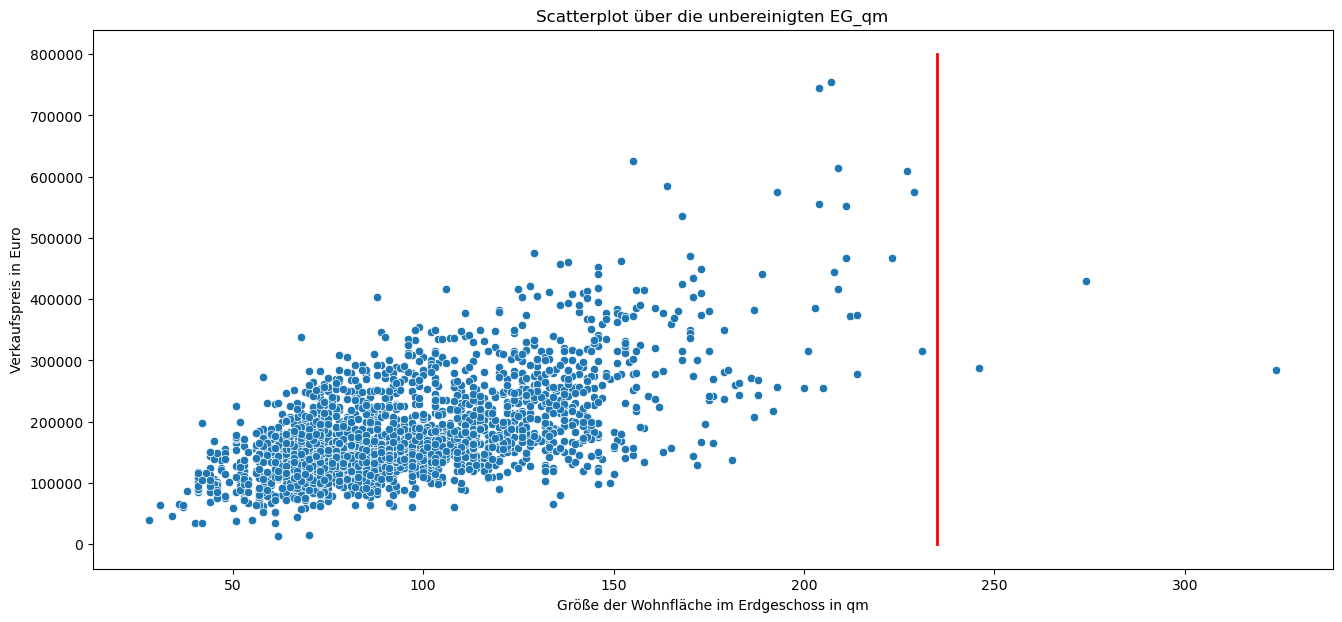

In [13]:
# Draw scatterplot with red line to illustrate the outliers
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_train, x="EG_qm", y="Z_Verkaufspreis")
plt.plot([235, 235], [800000, 0], linewidth=2, color="red")

plt.title("Scatterplot über die unbereinigten EG_qm")
plt.xlabel("Größe der Wohnfläche im Erdgeschoss in qm")
plt.ylabel("Verkaufspreis in Euro")

In [14]:
# Delete all outliers from the data set and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["EG_qm"] <= 235]
df_train_cleaned.loc[:, "EG_qm"].unique()

array([125, 170, 119,  64, 103,  89,  75,  70,  80,  97, 120,  91,  78,
       128, 117,  87,  62,  69, 115,  88,  68,  77,  94, 110, 106,  83,
       142,  90, 104,  82, 143,  63,  73, 189, 145, 109,  84, 122,  67,
       130,  99,  74,  81,  58, 155, 121,  66, 161,  44,  48,  57,  61,
        98, 131,  92,  85, 173,  93, 127, 154, 100, 108, 141,  60,  53,
        76, 126,  71, 102, 116, 111, 211, 175, 135, 164, 137, 124, 133,
        45,  72,  86, 193,  65, 118, 146,  96,  46, 140,  51,  79, 214,
       113, 151, 156, 138, 139, 129,  95, 107, 134, 101, 112, 132,  31,
       168, 201, 205, 114,  37, 152, 147, 149,  54,  59, 153, 212, 123,
        41, 179, 105, 158, 229, 165,  56,  47, 167, 223, 186,  34, 136,
        52,  36, 181, 144, 209, 163, 171, 150, 148, 207, 172, 203, 157,
        49, 187, 204,  50, 227, 200, 159, 192, 188,  43,  28,  42, 166,
       174, 183, 180, 176, 208,  38, 231,  55, 162], dtype=int64)

#### Garage_qm
Anhand eines Scatterplots prüfen, ob es starke Ausreiser bei der Größe der Garage gibt. Falls vorhanden werden diese Einträge aus dem Datensatz entfernt.

Text(0, 0.5, 'Verkaufspreis in Euro')

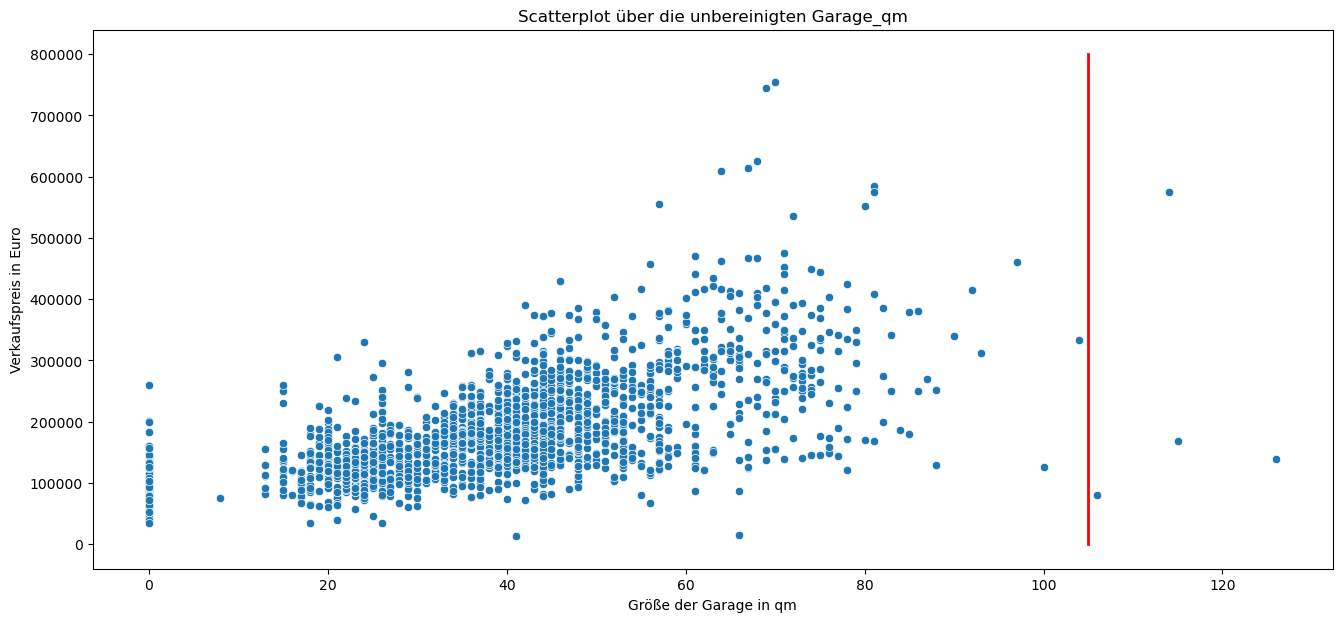

In [15]:
# Draw scatterplot with red line to illustrate the outliers
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_train, x="Garage_qm", y="Z_Verkaufspreis")
plt.plot([105, 105], [800000, 0], linewidth=2, color="red")

plt.title("Scatterplot über die unbereinigten Garage_qm")
plt.xlabel("Größe der Garage in qm")
plt.ylabel("Verkaufspreis in Euro")

In [16]:
# Delete all outliers from the data set and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["Garage_qm"] <= 105]
df_train_cleaned.loc[:, "Garage_qm"].unique()

array([ 49,  79,  40,  39,  27,  26,  53,  38,  24,  47,  41,  29,  33,
        42,  23,  32,   0,  34,  55,  44,  66,  19,  68,  54,  50,  72,
        28,  61,  22,  20,  52,  63,  37,  30,  43,  48,  25,  46,  18,
        31,  73,  21,  74,  57,  17,  15,  65,  51,  67,  69,  81,  71,
        35,  13,  70,  56,  78,  88,  45,  75,  36,  77,  58,  62,  64,
        90,  82,  59,  97,  86,  76,  80,   8,  60,  83,  16,  85,  92,
        93,  87, 104,  84], dtype=int64)

#### Keller_Typ_qm
Anhand eines Scatterplots prüfen, ob es starke Ausreiser bei der Größe des Kellertyps (Keller_Typ_qm) gibt. Falls vorhanden werden diese Einträge aus dem Datensatz entfernt.

Text(0, 0.5, 'Verkaufspreis in Euro')

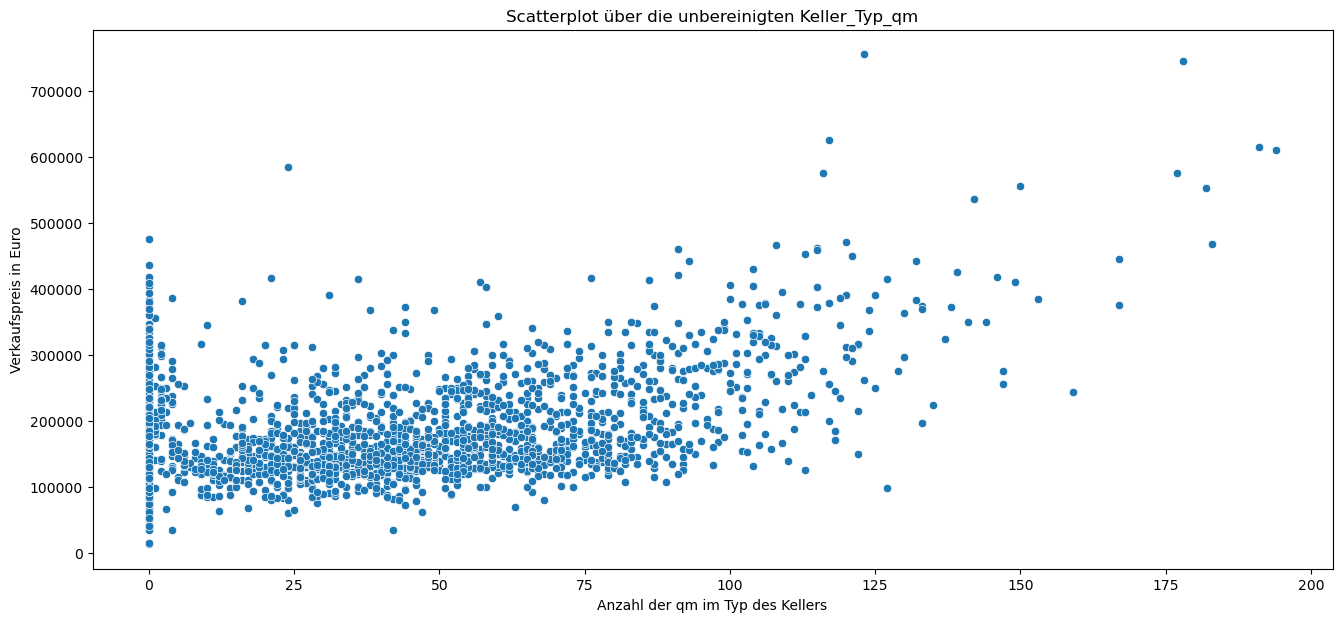

In [17]:
# Draw scatterplot with red line to illustrate the outliers
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_train, x="Keller_Typ_qm", y="Z_Verkaufspreis")
# plt.plot([160, 160], [800000, 0], linewidth=2, color="red")

plt.title("Scatterplot über die unbereinigten Keller_Typ_qm")
plt.xlabel("Anzahl der qm im Typ des Kellers")
plt.ylabel("Verkaufspreis in Euro")

#### Keller_qm
Anhand eines Scatterplots prüfen, ob es starke Ausreiser bei der Größe des Kellers (Keller_qm) gibt. Falls vorhanden werden diese Einträge aus dem Datensatz entfernt.

Text(0, 0.5, 'Verkaufspreis in Euro')

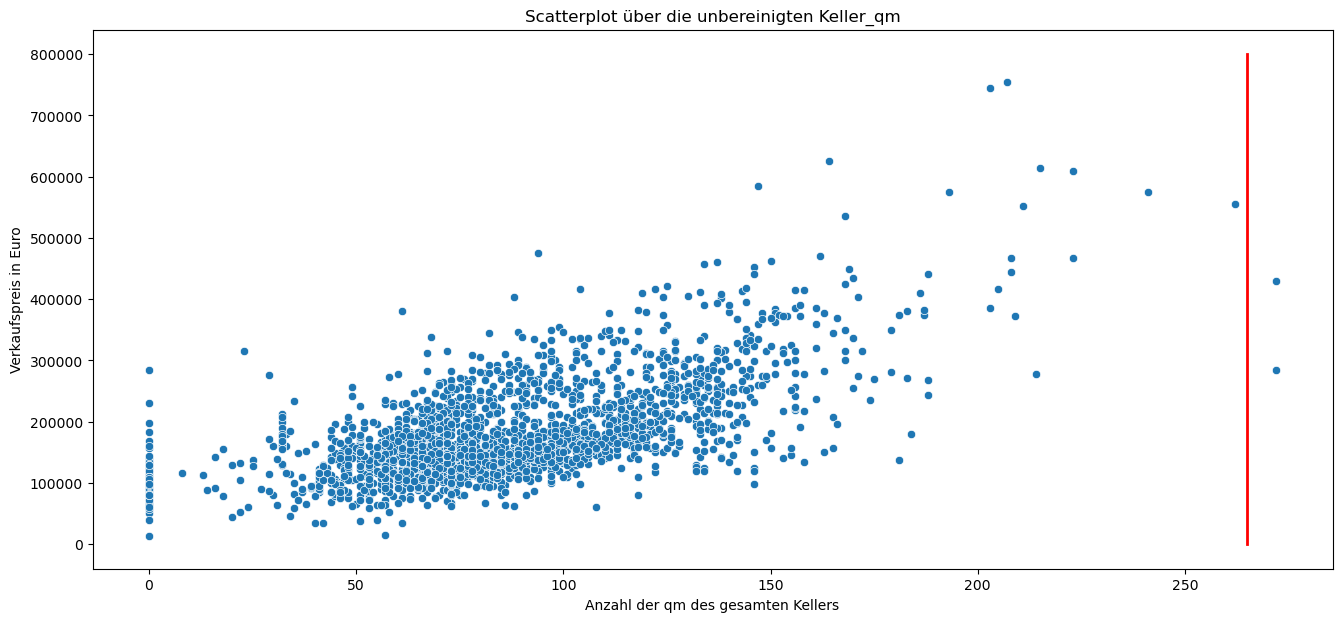

In [18]:
# Draw scatterplot with red line to illustrate the outliers
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_train, x="Keller_qm", y="Z_Verkaufspreis")
plt.plot([265, 265], [800000, 0], linewidth=2, color="red")

plt.title("Scatterplot über die unbereinigten Keller_qm")
plt.xlabel("Anzahl der qm des gesamten Kellers")
plt.ylabel("Verkaufspreis in Euro")

In [19]:
# Delete all outliers from the data set and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["Keller_qm"] <= 265]
df_train_cleaned.loc[:, "Keller_qm"].unique()

array([116, 168, 119,  64, 103,  89,  75,  70,  78,  97,  56,  92,  76,
         0,  61,  41,  53, 115,  91,  80,  90,  68,  79,  94, 110,  82,
        69,  88, 129,  77, 133,  51,  73, 188, 145, 122,  57, 100, 125,
        99,  95,  58, 158,  67, 106,  32,  66,  60,  44,  81,  48,  54,
        83, 124,  72, 123,  74,  85, 120, 169,  93, 127, 154, 108,  84,
        35, 143, 102,  59,  98, 140, 111, 208, 118, 172, 135, 147, 137,
        62, 155,  18,  40, 139,  86, 126,  22, 144,  13,  96,  45, 146,
       113,  46, 132, 214,  71, 105, 151, 156, 138, 134,  29, 149,  33,
        87, 101, 130,  16, 142, 104, 109,  65,  49,  63,  20, 121, 112,
       107, 153, 114,  24,  36,  42,  47, 209, 179,  52, 136, 241,  30,
       165,  55, 223, 183, 128,  34,  39, 162,  50, 181,  25, 205, 157,
        43, 117,  37, 163, 171, 211, 150,  27, 148,   8, 207, 152,  38,
       203, 161, 186, 187, 141,  31, 262, 170, 215, 164, 174, 166, 184,
        14, 175, 131,  23], dtype=int64)

#### OG_qm
Anhand eines Scatterplots prüfen, ob es starke Ausreiser bei der Größe des Geschosses oberhalb des EG (OG_qm) gibt. Falls vorhanden werden diese Einträge aus dem Datensatz entfernt.

Text(0, 0.5, 'Verkaufspreis in Euro')

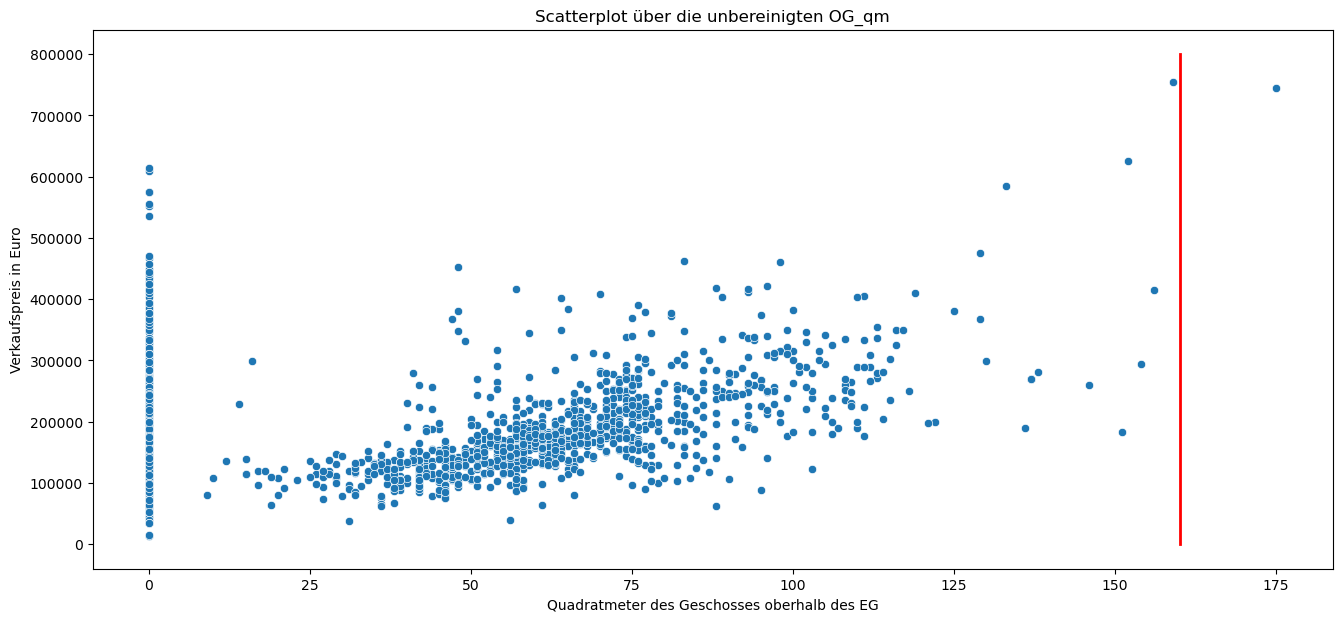

In [20]:
# Draw scatterplot with red line to illustrate the outliers
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_train, x="OG_qm", y="Z_Verkaufspreis")
plt.plot([160, 160], [800000, 0], linewidth=2, color="red")

plt.title("Scatterplot über die unbereinigten OG_qm")
plt.xlabel("Quadratmeter des Geschosses oberhalb des EG")
plt.ylabel("Verkaufspreis in Euro")

In [21]:
# Delete all outliers from the data set and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["OG_qm"] <= 160]
df_train_cleaned.loc[:, "OG_qm"].unique()

array([  0,  73,  72,  65,  77,  52,  58,  75,  79,  83,  74, 119,  59,
        62,  31,  49,  71,  42,  96,  47,  48,  70,  63,  91,  39,  44,
        64,  54, 154, 100, 108,  61,  53,  87,  45,  29,  88, 133,  80,
        78,  35,  57,  51,  67,  69,  56,  76,  43,  68,  82,  25,  46,
        66,  50, 156,  26,  85,  86, 103, 110,  89, 105,  36, 113,  99,
        60,  55,  38,  84,  97,  81,  93, 106,  41, 111,  98, 136,  90,
       125, 137, 109,  17,  92,  28,  27, 138, 102,  32,  94,  37,  33,
        40, 159, 112, 116,  14,  95, 118, 104, 115, 130,  34,  19, 146,
        12,  10,  18,  15,  30, 129, 152,  23, 117,  20,   9, 114,  21,
       151, 121, 107, 101], dtype=int64)

#### Wohnflaeche_qm
Anhand eines Scatterplots prüfen, ob es starke Ausreiser bei der Größe der gesamten Wohnfläche (Wohnflaeche_qm) gibt. Falls vorhanden werden diese Einträge aus dem Datensatz entfernt.

Text(0, 0.5, 'Verkaufspreis in Euro')

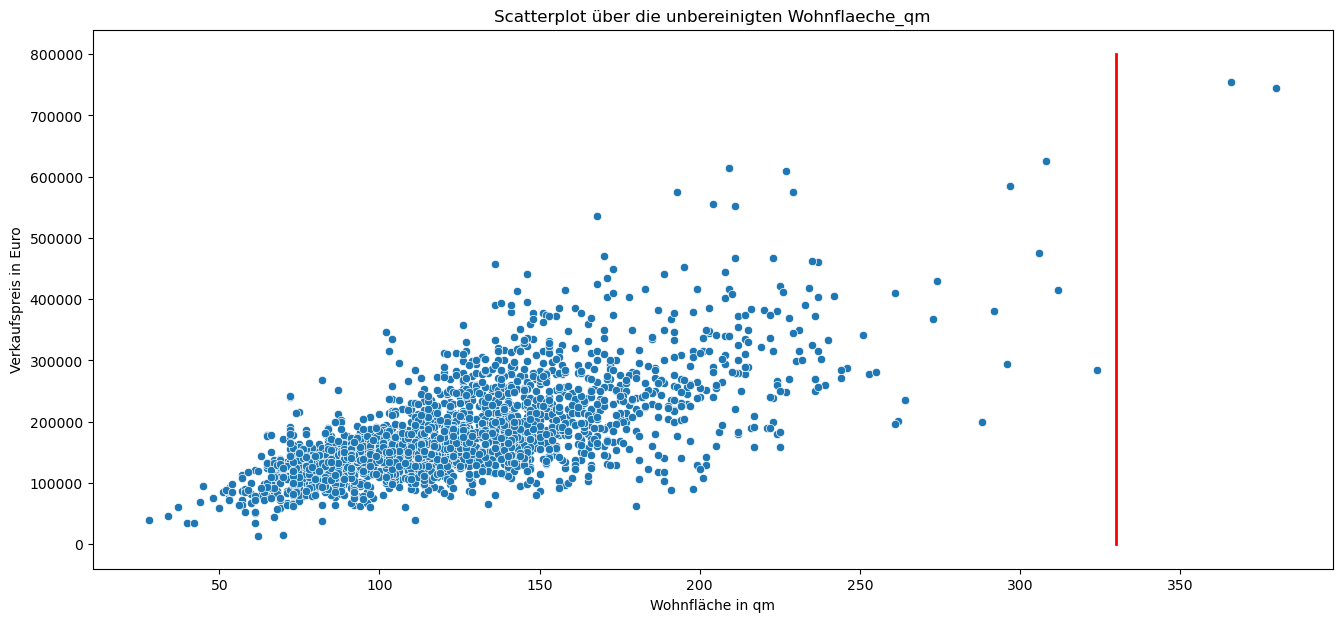

In [22]:
# Draw scatterplot with red line to illustrate the outliers
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_train, x="Wohnflaeche_qm", y="Z_Verkaufspreis")
plt.plot([330, 330], [800000, 0], linewidth=2, color="red")

plt.title("Scatterplot über die unbereinigten Wohnflaeche_qm")
plt.xlabel("Wohnfläche in qm")
plt.ylabel("Verkaufspreis in Euro")

In [23]:
# Delete all outliers from the data set and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["Wohnflaeche_qm"] <= 330]
df_train_cleaned.loc[:, "Wohnflaeche_qm"].unique()

array([125, 170, 119, 138, 103,  89,  75, 142, 145,  97, 198,  91,  78,
       128, 117, 140, 121,  69, 115,  80,  88, 141, 152, 166, 177, 110,
       157, 143, 261,  90, 181,  77,  63,  73, 189, 133, 149, 122, 225,
       227,  99, 106, 154, 123, 155, 136, 118, 131, 253,  82, 146, 109,
        94,  44,  81,  93, 111, 120, 296,  67,  98, 231,  92,  83, 139,
       191, 173, 151, 127, 186, 100, 108,  60,  76, 126, 169, 190, 211,
       102, 162, 220, 175, 135, 297,  74, 171, 203, 112, 104, 156, 137,
       159, 116,  45,  72, 150,  86, 165,  87,  96,  84, 194, 214, 113,
       124, 216, 312, 129, 172, 192, 158, 153, 212, 134, 101, 206, 130,
       217, 147, 107, 208, 144,  79, 132,  65, 204, 174, 193, 168, 160,
       201,  95,  61,  71, 180,  68, 205, 114,  37,  57, 223, 163, 235,
        53, 242, 179, 221, 262, 251, 105,  70, 229, 178, 187, 237, 292,
        85,  51, 219,  34, 236, 207, 183, 148, 213, 185, 234, 244, 255,
       164, 161, 209, 184,  64,  62,  48, 224, 202, 196, 226, 20

#### Kellerhoehe
Es existieren nur zwei "Sehr schlecht" Werte. Diese werden entfernt.

In [24]:
# Delete entries with very poor basement height and display unique entries
df_train_cleaned = df_train_cleaned.loc[df_train_cleaned["Kellerhoehe"] != 1]
df_train_cleaned.loc[:, "Kellerhoehe"].unique()

array([4, 3, 0, 5, 2], dtype=int64)

#### Baujahr, Gesamteindruck, Umgebaut, Verkaufsjahr, Verkaufsmonat, Z_Verkaufspreis
Die verbleibenden Spalten weisen keine Ausreißer, unzulässige Werte oder sonstige Auffälligkeiten auf. Daher sind keine Bereinigungen erforderlich.

#### Multivariater Ausreißer: Umbau vor dem Baujahr des Hauses
Es sollten Datensätze entfernt werden, bei denen Immobilien früher umgebaut wurden, als ihr Baujahr. Davon gibt es genau einen.

In [25]:
# Show records that match the rule and delete them
rule = (df_train_cleaned["Umgebaut"] < df_train_cleaned["Baujahr"])
display(df_train_cleaned[rule].loc[:, ["Umgebaut", "Baujahr"]])
df_train_cleaned.drop(df_train_cleaned[rule].index, inplace=True)

,Umgebaut,Baujahr
655,2013,2014


#### Multivariater Ausreißer: Hohe Ausbaustufe ohne Obergeschoss-Quadratmeterangabe
Es sollten Datensätze entfernt werden, bei denen die Ausbaustufe größer als 1 ist (Obergeschosse vorhanden) aber der Wert bei OG_qm gleich 0 ist. Davon gibt es 29 Stück.

In [26]:
# Show records that match the rule and delete them
rule = (df_train_cleaned["Ausbaustufe"] > 1) & (df_train_cleaned["OG_qm"] == 0)
display(df_train_cleaned[rule].loc[:, ["Ausbaustufe", "OG_qm"]])
df_train_cleaned.drop(df_train_cleaned[rule].index, inplace=True)

,Ausbaustufe,OG_qm
113,2,0
256,2,0
333,2,0
342,2,0
371,2,0
548,2,0
695,2,0
768,2,0
820,2,0
836,2,0


#### Multivariater Ausreißer: Mehr Garagen als Zimmer
Es sollten Datensätze entfernt werden, bei denen die Anzahl der Garagen die Anzahl an Zimmern um den doppelten Wert übersteigt. Davon gibt es genau 2.

In [27]:
# Show records that match the rule and delete them
rule = (df_train_cleaned["AnzahlZimmer"] * 2 < df_train_cleaned["Garagen"])
display(df_train_cleaned[rule].loc[:, ["AnzahlZimmer", "Garagen"]])
df_train_cleaned.drop(df_train_cleaned[rule].index, inplace=True)

,AnzahlZimmer,Garagen
1564,1,3
2266,1,3


#### Multivariater Ausreißer: Mehr Bäder/Toiletten im Keller als in den Obergeschossen
Es sollten Datensätze entfernt werden, bei denen die Anzahl der Bäder im Keller höher ist als in den Obergeschossen. Davon gibt es genau 3.

In [28]:
# Show records that match the rule and delete them
rule = (df_train_cleaned["Baeder"] < df_train_cleaned["BaederKG"])
display(df_train_cleaned[rule].loc[:, ["Baeder", "BaederKG"]])
df_train_cleaned.drop(df_train_cleaned[rule].index, inplace=True)

,Baeder,BaederKG
557,1,2
2222,1,2
2278,1,2


In [29]:
# Show records that match the rule and delete them
rule = (df_train_cleaned["Garagen"] >= 1) & (df_train_cleaned["Garage_qm"] == 0)
display(df_train_cleaned[rule].loc[:, ["Garagen", "Garage_qm"]])
df_train_cleaned.drop(df_train_cleaned[rule].index, inplace=True)

,Garagen,Garage_qm


### Korrelationsmatrix nach Abgeschlossener Data Preparation
Anhand der Korrelationsmatrix aus Aufgabe 2 soll abschließend untersucht werden, wie sich die Data Prepatation Schritte auf die Qualität der Korrelation zwischen Attributen und Verkaufspreis ausgewirkt haben.

Text(0.5, 1.0, 'Korrelations Heatmap mit allen Features')

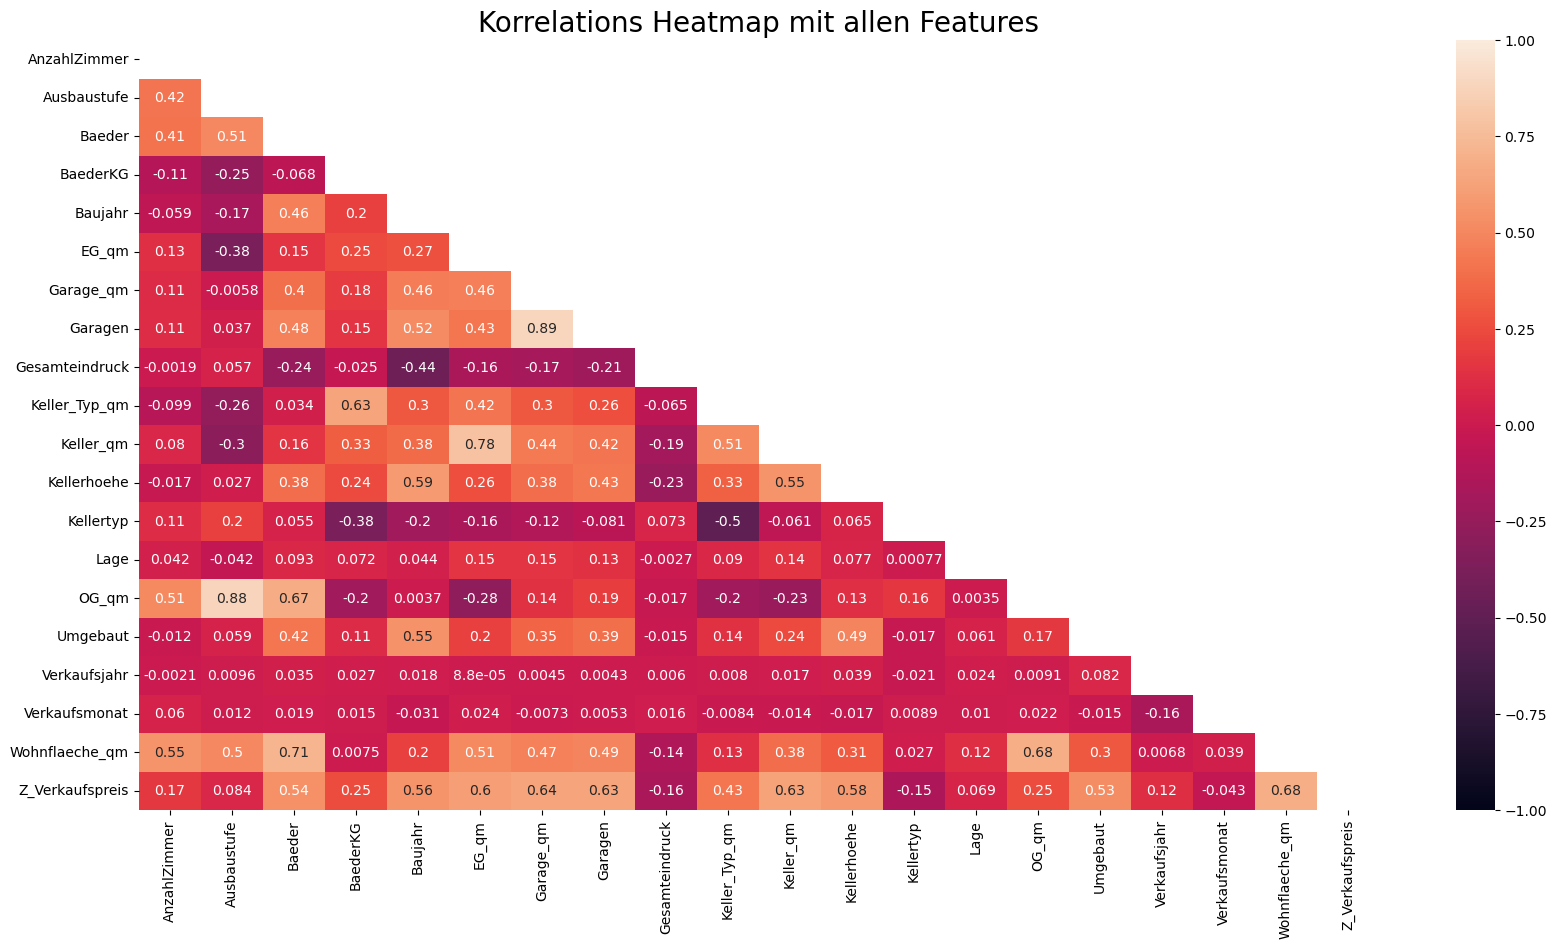

In [30]:
# Draw a correlation matrix heatmap and mask out the upper triangle
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df_train_cleaned.corr(), dtype=bool))
heatmap = sns.heatmap(df_train_cleaned.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
plt.title('Korrelations Heatmap mit allen Features', fontdict={'fontsize': 20})

- Durch das Encoding der kategorischen Daten kamen neue Features mit einer hohen Korrelation zum Verkaufspreis hinzu (z.B. Kellerhoehe).
- Durch die Ausreißererkennung und Datenbereinigung konnten die Korrelationen einiger bestehender Features mit dem Verkaufspreis gesteigert werden.

## 4. Modeling – Regression mit Inferenz (3 Punkte) (Anton)

**Aufgabenstellung**:
Führen Sie mit einem geeigneten Verfahren der linearen Regression eine Vorhersage des Preises (Z_Verkaufspreis) durch. Ggfs. brauchen Sie dafür mehrere Versionen der „einfachen“ Regressionslösungen, um eine akzeptable Performance zu erreichen. Erklären Sie wichtige identifizierten Zusammenhänge menschenverständlich als Text (z. B. „Eine Haustür erhöht den Preis um 2,75 EUR.“). 

### Cross Validierung:

In dieser Funktion wird die Cross-Validation des Models mit 10-fach Faltung ausgeführt. Der Scoring="r2" Parameter gibt an, welcher Wert für die Bewertung verwendet werden soll. R² ist zwar Standard, aber mit expliziter Angabe ist es eindeutiger und besser verständlich. Die Funktion gibt danach den Score für jede einzelne Kreuzvalidierung aus und berechnet den Durchschnitt von allen Durchläufen. Für mehr dazu siehe "Die Auswahl der reduzierten Features"

In [31]:
def cross_validate_model(model, x, y):
    show_decimals = 8
    validation = cross_validate(model, x, df_train_cleaned[y], cv=10, scoring="r2")
    print("Cross-Validation:")
    for score in validation['test_score']:
        print('\t' + str(np.round(score, decimals=show_decimals)))
    print('Mean of cross validation set: ' + str(np.round(np.mean(validation['test_score']), decimals=show_decimals))) 
    print('With a standard deviation of: ' + str(np.round(np.std(validation['test_score']), decimals=show_decimals)))

### Regression

Es wird zuerst das Model kreuz-validiert, danach wird es gefittet. Das fitten ist notwendig, um händisch den R² Wert des Modells zu berechnen, wenn es auf den gesamten Daten trainiert wird. Außerdem ist das fitten notwendig, um später in get_coefs() Wertsteigerung pro einer Einheit eines Features berechnen zu können. 

In [32]:
def do_regression(model, x, y):
    cross_validate_model(model, x, y_fields)
    model.fit(x, y)
    y_predict = pd.DataFrame(model.predict(x).astype(int), columns=['Prediction'])
    r2 = metrics.r2_score(y_true=df_train_cleaned['Z_Verkaufspreis'], y_pred=y_predict)
    print("R^2 of whole set: " + str(r2))
    return model

### Berechnung der Abhängigkeiten eines einzelnen Features

Hier wird die Wertsteigerung, welche eine Einheit eines Features ausmacht, berechnet und ausgegeben. Es werden alle Features verwendet, um einen gesamten Überblick zu gewähren. Zur genaueren Auswertung folgt unten ein weiter Text.

In [33]:
def get_coefs(model, x, y):
    coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
    print(coefficients)

### Die Auswahl der reduzierten Features
Um die Feature-Kombinationen untereinander vergleichen zu können, wurde die Funktion cross_validate_model verwendet. Diese cross-validiert mit einer 10-fachen Faltung. Die jeweiligen R^2 Werte wurden dann im Durchschnitt genommen. Die einzelnen Werte jeder Faltung geben an, wie sehr die Daten sich unterscheiden. Man kann daraus also ablesen, wie sehr die Einteilung in Trainings- und Testdaten sich auf die Genauigkeit der Prognose auswirken. Der Durchschnitt daraus ist dann sinnvoll, um jede entstandene Einteilungskombination der Daten gleich zu gewichten. Gegenüber dem R^2-Wert, der in do_regression auf das gesamte Model berechnet wird hat dies als Vorteil, das bei der Crossvalidierung mit Daten getestet wird, welche das Modell nicht zum trainieren verwendete. Bei der simplen R^2 Berechnung in do_regression() ist dies nicht so, da alle Daten für das Training verwendet wurden. Darum ist der Durchschnitt der Cross-Validierung als Parameter für die Featureauswahl gewählt worden.

Das Vorgehen für die Feature-Reduktion war, mit allen Features anzufangen (Ohne Nominalskalen) und dann vereinzelte Features wegzulassen. Für diese Auswahl wurde sich grob an der Korrelationsheatmap mit allen Features orientiert (s.o.). Wirkte sich ein Feature sehr auf die Genauigkeit aus, wurde es behalten. Dokumentiert sind nachfolgend einige Zwischenstufen, um einen groben Verlauf darzustellen. Theoretisch wäre auch möglich, jede Kombination auszuprobieren und die Kombination mit der höchsten Genauigkeit zu wählen. Da dies 262143 Kombinationen darstellt, wurde auf diesen Rechenaufwand verzichtet (Alle Binomialkoeffizienten von 18 über 1 zu 18 über 18 aufsummiert).

Es wurde dabei von Anfang an der Verkaufspreis aus den Daten entfernt, da das Modell diesen vorher sagen soll und nicht zur Vorhersage verwenden soll.

Alle Features:  
["AnzahlZimmer","Ausbaustufe","Baeder","BaederKG","Baujahr","EG_qm","Garage_qm","Garagen","Gesamteindruck",
"Keller_Typ_qm","Keller_qm","Kellerhoehe","Kellertyp","Lage","OG_qm","Umgebaut","Verkaufsjahr","Verkaufsmonat","Wohnflaeche_qm"]: 

0.80156342

Ohne Nominalskalen:  
["AnzahlZimmer","Ausbaustufe","Baeder","BaederKG","Baujahr","EG_qm","Garage_qm","Garagen","Gesamteindruck",
"Keller_Typ_qm","Keller_qm","Kellerhoehe",
"Kellertyp"
,"OG_qm","Umgebaut","Verkaufsjahr","Verkaufsmonat","Wohnflaeche_qm"]: 

0.79685377

["AnzahlZimmer","Baeder","Baujahr","EG_qm","Garage_qm","Garagen","Keller_Typ_qm","Keller_qm","Kellertyp","OG_qm","Umgebaut","Wohnflaeche_qm"]: 

0.78037179

["AnzahlZimmer","Baeder","Baujahr","Garagen","Keller_Typ_qm","Keller_qm","OG_qm","Umgebaut","Wohnflaeche_qm"]: 

0.77778304

["AnzahlZimmer","Baujahr","Garagen","Keller_Typ_qm","Keller_qm","Umgebaut","Wohnflaeche_qm"]: 

0.77739578

Das Feature 'Lage' wurde gestrichen, da es sich hier um eine Nominalskala handelt, es kann also an der Skala nicht abgelesen werden, was besser ist. Da lineare Regression allerdings eine Rangordnung benötigt, (also mind. Ordinalskala) kann dieser Wert hierfür nicht verwendet werden. In "Alle Features" ist er für die Vollständigkeit allerdings trotzdem enthalten.

Es wurde sich schlussendlich für die letzten Features entschieden, da sie nicht weiter reduzierbar sind, ohne die Genauigkeit zu sehr einzuschränken. Als Bemerkung hierzu kann noch gesagt werden, dass dies vermutlich nicht die beste, aber eine sehr gute Selektion ist (da sie mit wenig Features auskommt).


In [34]:
x_fields_all = ["AnzahlZimmer","Ausbaustufe","Baeder","BaederKG","Baujahr","EG_qm","Garage_qm","Garagen","Gesamteindruck","Keller_Typ_qm","Keller_qm","Kellerhoehe","Kellertyp","Lage","OG_qm","Umgebaut","Verkaufsjahr","Verkaufsmonat","Wohnflaeche_qm"] 
x_fields_reduced = ["AnzahlZimmer","Baujahr","Garagen","Keller_Typ_qm","Keller_qm","Umgebaut","Wohnflaeche_qm"] 
y_fields = "Z_Verkaufspreis"
x_all = df_train_cleaned[x_fields_all]
x_reduced = df_train_cleaned[x_fields_reduced]
y = df_train_cleaned[y_fields]

_ = do_regression(LinearRegression(), x_reduced, y)

Cross-Validation:
	0.75955859
	0.77426227
	0.77207994
	0.81628059
	0.80991131
	0.78181515
	0.77650214
	0.77947236
	0.74911056
	0.75690421
Mean of cross validation set: 0.77758971
With a standard deviation of: 0.02041997
R^2 of whole set: 0.7817390583696467


### Auswertung Regression mit reduzierten Features:

Die Werte der einzelnen Aufteilung der Cross-Validierung ähneln sich recht stark, die Standard-Abweichung ist relativ niedrig. Dadurch kann der Durchschnitt als aussagekräftig angesehen werden. 

In [35]:
model_for_coefs = do_regression(LinearRegression(), x_all, y)

Cross-Validation:
	0.8021965
	0.81931183
	0.77901366
	0.82964735
	0.84039524
	0.78846702
	0.77261193
	0.81648893
	0.78453333
	0.78184888
Mean of cross validation set: 0.80145147
With a standard deviation of: 0.02243112
R^2 of whole set: 0.8084695842934644


### Auswertung Regression mit allen Features:

Die Werte sind genau wie bei der Regression mit reduzierten Features ohne starke Ausreißer um den Durchschnitt verteilt und die Standard-Abweichung ist auch relativ gering. Die ungefähren 2,5% Einbuße in der Leistung werden hingenommen im Austausch dafür, die Features von 19 auf 7 reduziert zu haben.

### Unterschied von alle Featues auf reduzierte Features:


In [36]:
get_coefs(model_for_coefs, x_all, y)

                 0             0
0     AnzahlZimmer -10660.589261
1      Ausbaustufe   -756.840912
2           Baeder  -2832.645953
3         BaederKG    618.995977
4          Baujahr    518.995298
5            EG_qm    644.886089
6        Garage_qm    590.027553
7          Garagen   1339.419877
8   Gesamteindruck   9918.390836
9    Keller_Typ_qm    186.323054
10       Keller_qm    387.200426
11     Kellerhoehe   6829.379724
12       Kellertyp  -1310.354861
13            Lage   -808.751766
14           OG_qm    577.444468
15        Umgebaut    420.145548
16    Verkaufsjahr   5070.957162
17   Verkaufsmonat   -846.167725
18  Wohnflaeche_qm    411.605176


### Auswertung Gewichtung einzelner Features:

In dieser Metrik kann man nun die Gewichtung einzelner Features im erhaltenen Modell erkennen. Man kann bspw. sagen eine Garage erhöht den durchschnittlichen Verkaufspreis um 1333€. 
Auffällige Werte hier sind:

Anzahl Zimmer: Dieser relativ hohe Wert pro Zimmer wirkt kontraintuitiv, da eigentlich ein Haus mit mehr Zimmern teurer sein müsste. Aus dem Plot geht hervor, das Häuser mit vielen Zimmern (5 und 6) geringere Maximalpreise erzielen. Dadurch diese negative Korrelation.

Ausbaustufe: Hier ziehen die Häuser mit Ausbaustufe 3 die Vorhersage so stark runter, das eine negative Korrelation entsteht. 

Baeder: Bei dem Wert der Bäder kann man vermuten, dass hier auch eine negative Korrelation entsteht aufgrund der deutlich geringer ausfallenden maximalen Verkaufspreise von Immobilien mit 6 Bädern

Kellertyp: Da es sich bei diesem Feature um keine Ordinalskala handelt, ist der Wert nicht aussagekräftig.

Lage: Da es sich bei diesem Feature um keine Ordinalskala handelt, ist der Wert nicht aussagekräftig.

Verkaufsmonat: Es ist zwar ein Zusammenhang (auch im Diagramm) zu erkennen, allerdings wird hier nicht weiter darauf eingegangen, da vermutet wird, das es sich um keinen kausalen Zusammenhang zwischen Verkaufsmonat und Verkaufspreis handelt. (Siehe auch Korrelationsmatrix oben, sie Korrelieren mit -0.043)

[]

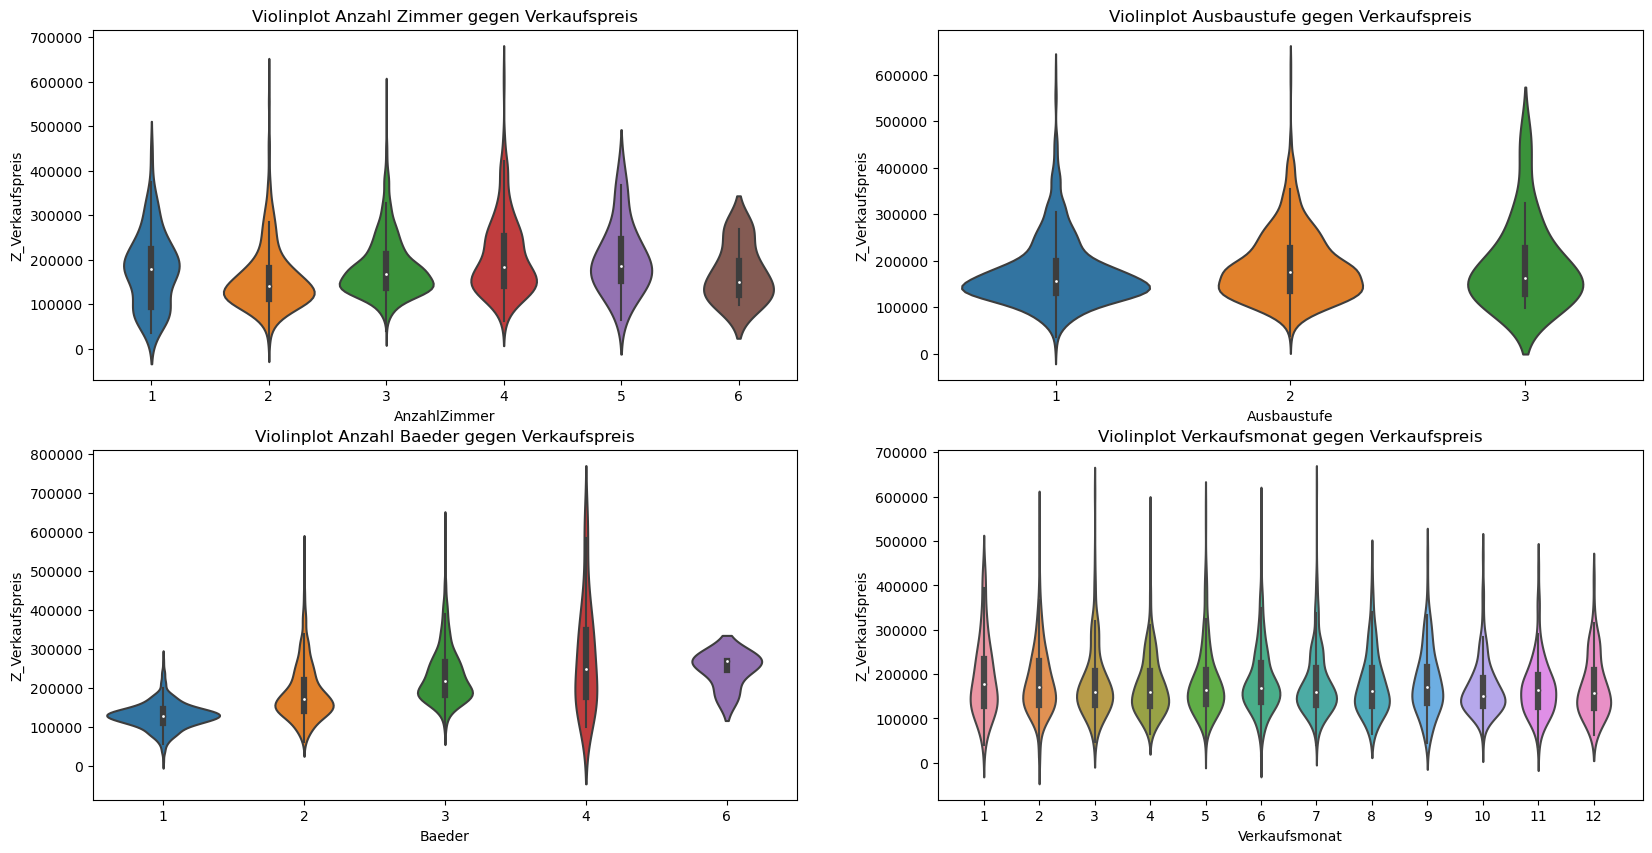

In [46]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.violinplot(data=df_train_cleaned, x="AnzahlZimmer", y="Z_Verkaufspreis")
plt.title("Violinplot Anzahl Zimmer gegen Verkaufspreis")

plt.subplot(2,2,2)
sns.violinplot(data=df_train_cleaned, x="Ausbaustufe", y="Z_Verkaufspreis")
plt.title("Violinplot Ausbaustufe gegen Verkaufspreis")

plt.subplot(2,2,3)
sns.violinplot(data=df_train_cleaned, x="Baeder", y="Z_Verkaufspreis")
plt.title("Violinplot Anzahl Baeder gegen Verkaufspreis")

plt.subplot(2,2,4)
sns.violinplot(data=df_train_cleaned, x="Verkaufsmonat", y="Z_Verkaufspreis")
plt.title("Violinplot Verkaufsmonat gegen Verkaufspreis")
plt.plot()

## 5. Modeling und Evaluation (6 Punkte) (Jonathan)

**Aufgabenstellung**:
Vergleichen und optimieren Sie ein oder mehrere weitere Verfahren zur Vorhersage des Verkaufspreises. Gehen Sie vor wie in der Vorlesung gelehrt mit Trainings- und Validierungsdaten (80-20). Optimieren Sie Ihre Vorhersage wenn sinnvoll.

In [38]:
#5

## 6. Deployment (3 Punkte) (Anton)

**Aufgabenstellung**: Erstellen Sie eine Anleitung oder Handreichung für die in Aufgabe 1 genannte Zielgruppe. Dies soll aus Zielgruppensicht wichtige Erkenntnisse der Aufgaben 2 bis 5 zusammenfassen und maximal 2 Seiten im pdf-Ausdruck umfassen, welche auf Basis der Texte aus Aufgabe 1 dann komplett eigenständig lesbar sein sollen. 

In [39]:
#6

## 7.  Classification  (3  Punkte) (Anton)

**Aufgabenstellung**:
Versuchen  Sie  Immobilien  dem  richtigen  Bezirk zuzuordnen, dabei können Sie den Preis als Eingabewert nehmen. Bewerten Sie die Qualität Ihrer Lösung und kommentieren Sie Ihre Erkenntnisse aus diesem kleinen Test. Erwarteter Umfang entspricht 3 Punkten von 30.   

In [40]:
#7